## Findings
    -> We can see different heat map for differnt test data, while most of them have different error rate.
    -> We can see that the heat map would be different consideing the fact that, error rate is different.
    -> We would probbaly generate different heat map, for different range of errors.

## Research path -
    -> Ways to improve the model performace using/through/by XAI
## Tasks -
    -> Generate Attention Map
    -> Do perturbation analysis/ add or remove data points/ Use any classification technique to improve model performance
    -> Use some other technique using XAI and compare the results
    -> Propose some novel technique
    -> Create seperate model for different cities


## Writing suggession
    -> Have to write why, demand forecasting is important
    -> The money issue, And what we are tring to achieve from the thesis


# Improvements suggested -
    -> Add window feature
    -> Add lag feature from previous week same day
    -> Add skill score
    -> Use absolute error for test data
    -> Use baseline forescast to evaluate the model


In [32]:
%reload_ext autoreload
%autoreload 2
import sys
sys.path.insert(0, '../helper/')

In [33]:
import numpy as np
from sklearn.model_selection import train_test_split
from scipy import stats
import data as data_helper
import model as model_helper
import config
import localStorage

## Global Variables


In [48]:
city_name = "tromsÃƒÂ¸"
summery = { city_name: {} }

## Load the data


In [43]:
train = data_helper.load_train_data(city_name)


In [44]:
train = data_helper.filter_train_data(train)


In [45]:
train.head()


,place,temperature,demand
time,,,
2022-04-08 00:00:00,tromsÃ¸,-5.7,1.140786
2022-04-08 01:00:00,tromsÃ¸,-3.9,1.140567
2022-04-08 02:00:00,tromsÃ¸,-3.5,1.159867
2022-04-08 03:00:00,tromsÃ¸,-3.8,1.164006
2022-04-08 04:00:00,tromsÃ¸,-4.5,1.261610


# Data analysis


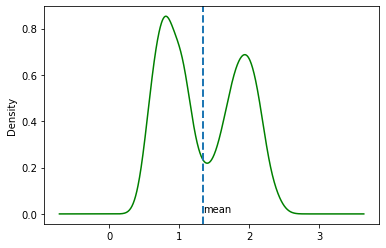

In [111]:
data_helper.show_density_plot(train)

In [46]:
train.isna().sum()


place          0
temperature    0
demand         0
dtype: int64

## Feature engineering


- Time Feature Extraction\
  -> Year\
  -> month_cos\
  -> month_sin\
  -> day_cos\
  -> day_sin\
  -> hour_cos\
  -> hour_sin\
  -> Public holiday or not\
  -> Daylight savings or not\
  -> Weekend or not\
  -> Business hour or not\
  -> Season of the year


In [47]:
train_1 = data_helper.add_feature(train)


In [49]:
train_1.head()

,place,temperature,demand,month_sin,month_cos,day_sin,day_cos,hour_sin,hour_cos,business_hour,season,weekend,daylight,holiday
time,,,,,,,,,,,,,,
2022-04-08 00:00:00,tromsÃ¸,-5.7,1.140786,0.866025,-0.5,0.993257,-0.115935,0.000000,1.000000,0,spring,0,1,0
2022-04-08 01:00:00,tromsÃ¸,-3.9,1.140567,0.866025,-0.5,0.993257,-0.115935,0.269797,0.962917,0,spring,0,1,0
2022-04-08 02:00:00,tromsÃ¸,-3.5,1.159867,0.866025,-0.5,0.993257,-0.115935,0.519584,0.854419,0,spring,0,1,0
2022-04-08 03:00:00,tromsÃ¸,-3.8,1.164006,0.866025,-0.5,0.993257,-0.115935,0.730836,0.682553,0,spring,0,1,0
2022-04-08 04:00:00,tromsÃ¸,-4.5,1.261610,0.866025,-0.5,0.993257,-0.115935,0.887885,0.460065,0,spring,0,1,0


- One hot encode


In [50]:
train_2 = data_helper.one_hot_encoding(train_1, ['season'])

In [51]:
train_2.head()

,place,temperature,demand,month_sin,month_cos,day_sin,day_cos,hour_sin,hour_cos,business_hour,weekend,daylight,holiday,autumn,spring,summer
time,,,,,,,,,,,,,,,,
2022-04-08 00:00:00,tromsÃ¸,-5.7,1.140786,0.866025,-0.5,0.993257,-0.115935,0.000000,1.000000,0,0,1,0,0,1,0
2022-04-08 01:00:00,tromsÃ¸,-3.9,1.140567,0.866025,-0.5,0.993257,-0.115935,0.269797,0.962917,0,0,1,0,0,1,0
2022-04-08 02:00:00,tromsÃ¸,-3.5,1.159867,0.866025,-0.5,0.993257,-0.115935,0.519584,0.854419,0,0,1,0,0,1,0
2022-04-08 03:00:00,tromsÃ¸,-3.8,1.164006,0.866025,-0.5,0.993257,-0.115935,0.730836,0.682553,0,0,1,0,0,1,0
2022-04-08 04:00:00,tromsÃ¸,-4.5,1.261610,0.866025,-0.5,0.993257,-0.115935,0.887885,0.460065,0,0,1,0,0,1,0


- Scale the data


In [52]:
x_scaler, y_scaler, train_3 = data_helper.scale(train_2)

In [53]:
train_3.head()

,autumn,business_hour,day_cos,day_sin,daylight,holiday,hour_cos,hour_sin,month_cos,month_sin,place,spring,summer,weekend,temperature,demand
time,,,,,,,,,,,,,,,,
2022-04-08 00:00:00,0,0,-0.115935,0.993257,1,0,1.000000,0.000000,-0.5,0.866025,tromsÃ¸,1,0,0,-0.599099,-0.295122
2022-04-08 01:00:00,0,0,-0.115935,0.993257,1,0,0.962917,0.269797,-0.5,0.866025,tromsÃ¸,1,0,0,-0.518018,-0.295323
2022-04-08 02:00:00,0,0,-0.115935,0.993257,1,0,0.854419,0.519584,-0.5,0.866025,tromsÃ¸,1,0,0,-0.500000,-0.277612
2022-04-08 03:00:00,0,0,-0.115935,0.993257,1,0,0.682553,0.730836,-0.5,0.866025,tromsÃ¸,1,0,0,-0.513513,-0.273814
2022-04-08 04:00:00,0,0,-0.115935,0.993257,1,0,0.460065,0.887885,-0.5,0.866025,tromsÃ¸,1,0,0,-0.545045,-0.184250


- Rearrange the columns


In [54]:
train_4 = train_3[config.COLUMN_NAMES]

In [55]:
train_4.head()

,spring,summer,autumn,month_sin,month_cos,day_sin,day_cos,hour_sin,hour_cos,business_hour,weekend,daylight,holiday,temperature,demand
time,,,,,,,,,,,,,,,
2022-04-08 00:00:00,1,0,0,0.866025,-0.5,0.993257,-0.115935,0.000000,1.000000,0,0,1,0,-0.599099,-0.295122
2022-04-08 01:00:00,1,0,0,0.866025,-0.5,0.993257,-0.115935,0.269797,0.962917,0,0,1,0,-0.518018,-0.295323
2022-04-08 02:00:00,1,0,0,0.866025,-0.5,0.993257,-0.115935,0.519584,0.854419,0,0,1,0,-0.500000,-0.277612
2022-04-08 03:00:00,1,0,0,0.866025,-0.5,0.993257,-0.115935,0.730836,0.682553,0,0,1,0,-0.513513,-0.273814
2022-04-08 04:00:00,1,0,0,0.866025,-0.5,0.993257,-0.115935,0.887885,0.460065,0,0,1,0,-0.545045,-0.184250


- Lag feature


In [56]:
train_5 = data_helper.add_lag(train_4, 1)

In [57]:
train_5.head()

,spring,summer,autumn,month_sin,month_cos,day_sin,day_cos,hour_sin,hour_cos,business_hour,weekend,daylight,holiday,temperature,demand-1,demand
time,,,,,,,,,,,,,,,,
2022-04-08 00:00:00,1,0,0,0.866025,-0.5,0.993257,-0.115935,0.000000,1.000000,0,0,1,0,-0.599099,0.000000,-0.295122
2022-04-08 01:00:00,1,0,0,0.866025,-0.5,0.993257,-0.115935,0.269797,0.962917,0,0,1,0,-0.518018,-0.295122,-0.295323
2022-04-08 02:00:00,1,0,0,0.866025,-0.5,0.993257,-0.115935,0.519584,0.854419,0,0,1,0,-0.500000,-0.295323,-0.277612
2022-04-08 03:00:00,1,0,0,0.866025,-0.5,0.993257,-0.115935,0.730836,0.682553,0,0,1,0,-0.513513,-0.277612,-0.273814
2022-04-08 04:00:00,1,0,0,0.866025,-0.5,0.993257,-0.115935,0.887885,0.460065,0,0,1,0,-0.545045,-0.273814,-0.184250


- Baseline feature


In [58]:
train_6 = data_helper.add_baseline_feature(train_5)


In [59]:
train_6.head()


,spring,summer,autumn,month_sin,month_cos,day_sin,day_cos,hour_sin,hour_cos,business_hour,weekend,daylight,holiday,temperature,base_line_demand,demand-1,demand
time,,,,,,,,,,,,,,,,,
2022-04-08 00:00:00,1,0,0,0.866025,-0.5,0.993257,-0.115935,0.000000,1.000000,0,0,1,0,-0.599099,-0.295122,0.000000,-0.295122
2022-04-08 01:00:00,1,0,0,0.866025,-0.5,0.993257,-0.115935,0.269797,0.962917,0,0,1,0,-0.518018,-0.295323,-0.295122,-0.295323
2022-04-08 02:00:00,1,0,0,0.866025,-0.5,0.993257,-0.115935,0.519584,0.854419,0,0,1,0,-0.500000,-0.277612,-0.295323,-0.277612
2022-04-08 03:00:00,1,0,0,0.866025,-0.5,0.993257,-0.115935,0.730836,0.682553,0,0,1,0,-0.513513,-0.273814,-0.277612,-0.273814
2022-04-08 04:00:00,1,0,0,0.866025,-0.5,0.993257,-0.115935,0.887885,0.460065,0,0,1,0,-0.545045,-0.184250,-0.273814,-0.184250


- Split the final data for Base-line model


In [60]:
train_split_base_X = train_6.iloc[:, :-1]
train_split_base_Y = train_6.iloc[:, -1]


In [61]:
X_train_base, X_test_base, Y_train_base, Y_test_base = train_test_split(train_split_base_X, train_split_base_Y, test_size=0.2, random_state=0)


- Create sequence


In [62]:
train_split_X, train_split_Y = data_helper.split_sequences(train_6, config.WINDOW_SIZE)


- Train test split


In [63]:
X_train, X_test, Y_train, Y_test = train_test_split(train_split_X, train_split_Y, test_size=0.2, random_state=0)


- Model preparation


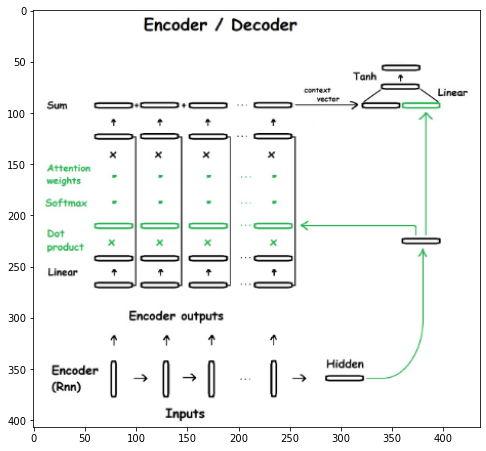

In [64]:
model_helper.show_me()

In [65]:
PATH = f"./data/{city_name}_model_XAI"
model = model_helper.train_model(np.shape(X_train[0])[-1], X_train, Y_train, X_test, Y_test, False, config.BATCH_SIZE, config.NUM_EPOCHS, config.PRC_EPOCH, PATH, True)


the model  ./data/tromsÃƒÂ¸_model_XAI has beed loaded !


- Test the performance


  0%|          | 0/1690 [00:00<?, ?it/s]

d:\Semester 4\XAI\../helper\model.py:316: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\torch\csrc\utils\tensor_new.cpp:248.)
  seq = torch.FloatTensor([X[index]]).to(device=config.DEVICE)


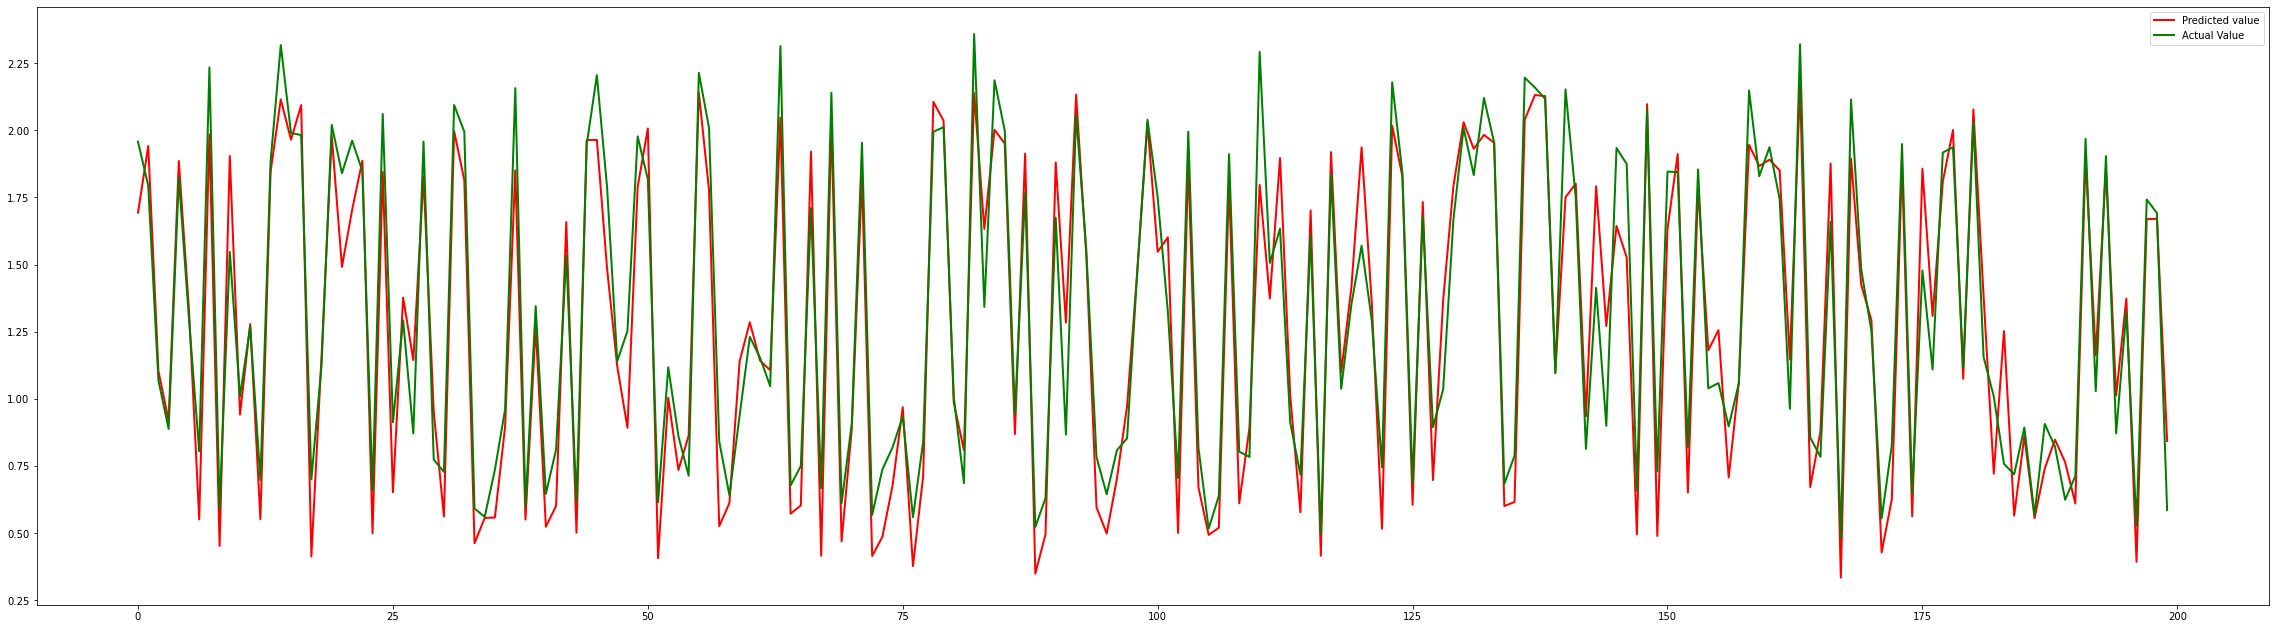

Rmse lsoss -> 0.5392748096720561
Mean absolute error -> 0.14897821843624115
R2 score -> 90.0


In [66]:
base_model_actual_value, base_model_predicted_value, base_model_RSME_score, base_model_R2_score, base_model_MAE_score, _, _ = model_helper.display_results(model, X_test, Y_test, y_scaler, (0, 2.3), (200, 400))
# print(actual), print(predicted)
# Comment about the result:: Capture variation but missing trend


- Generate the explaination (global)


  0%|          | 0/85 [00:00<?, ?it/s]

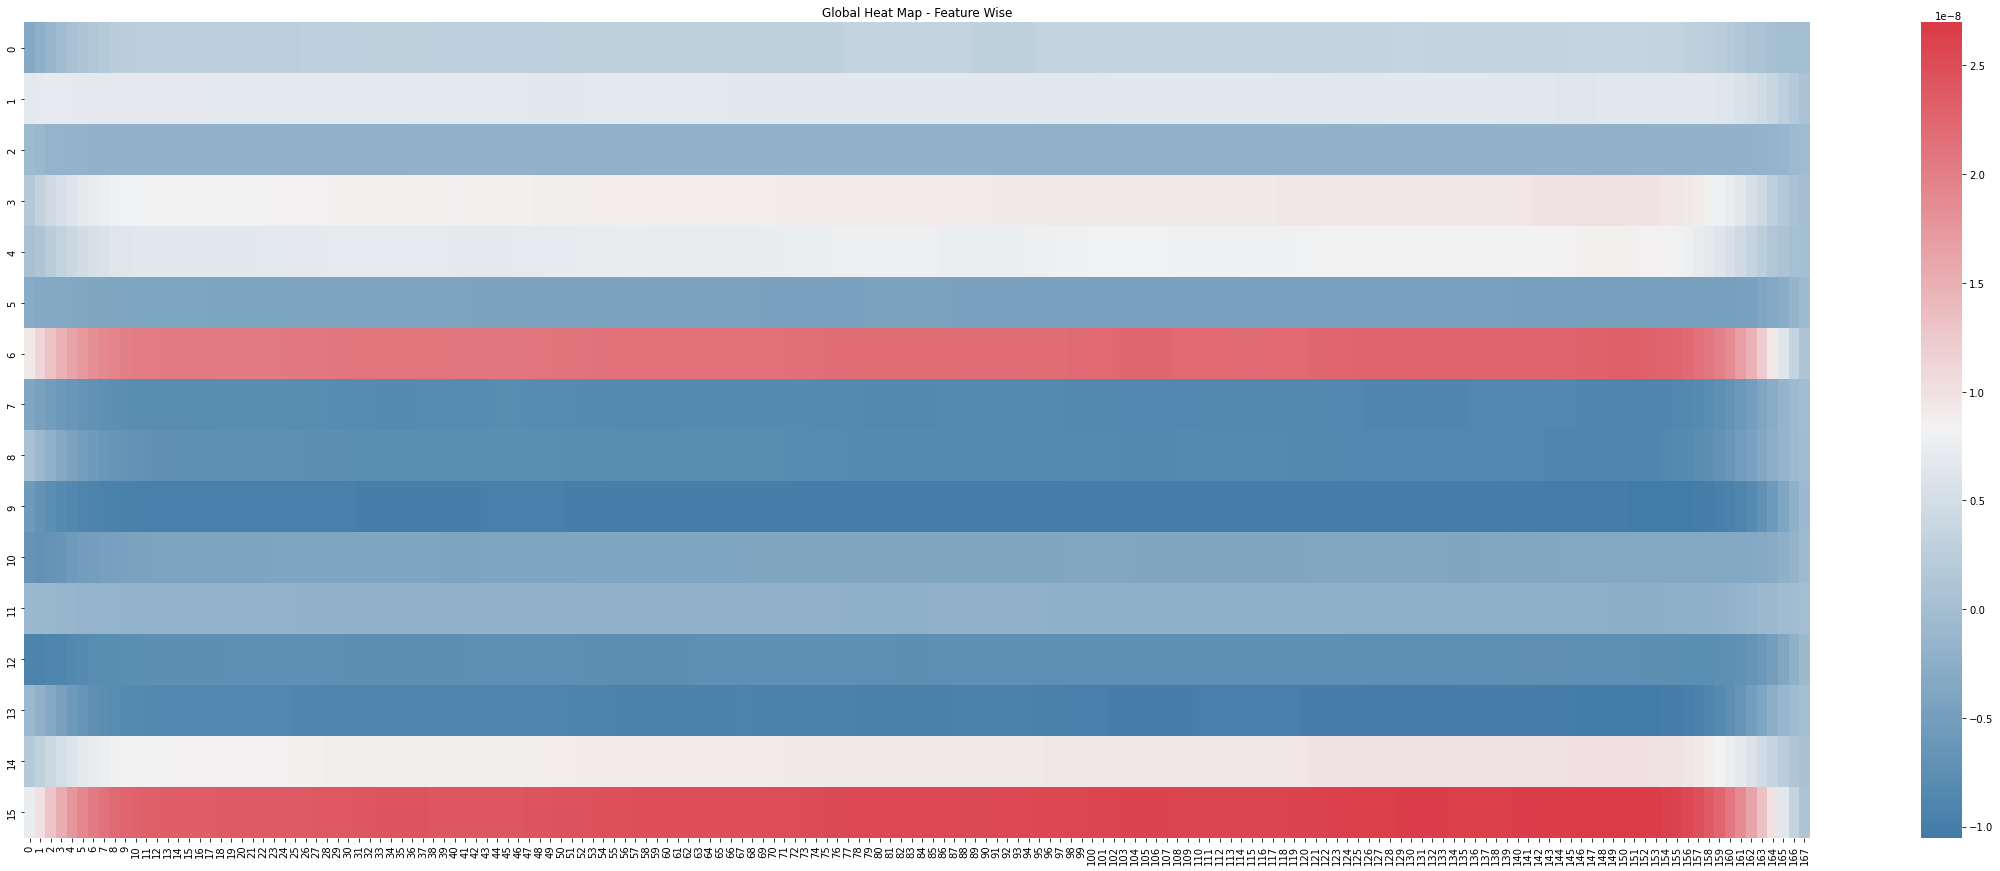

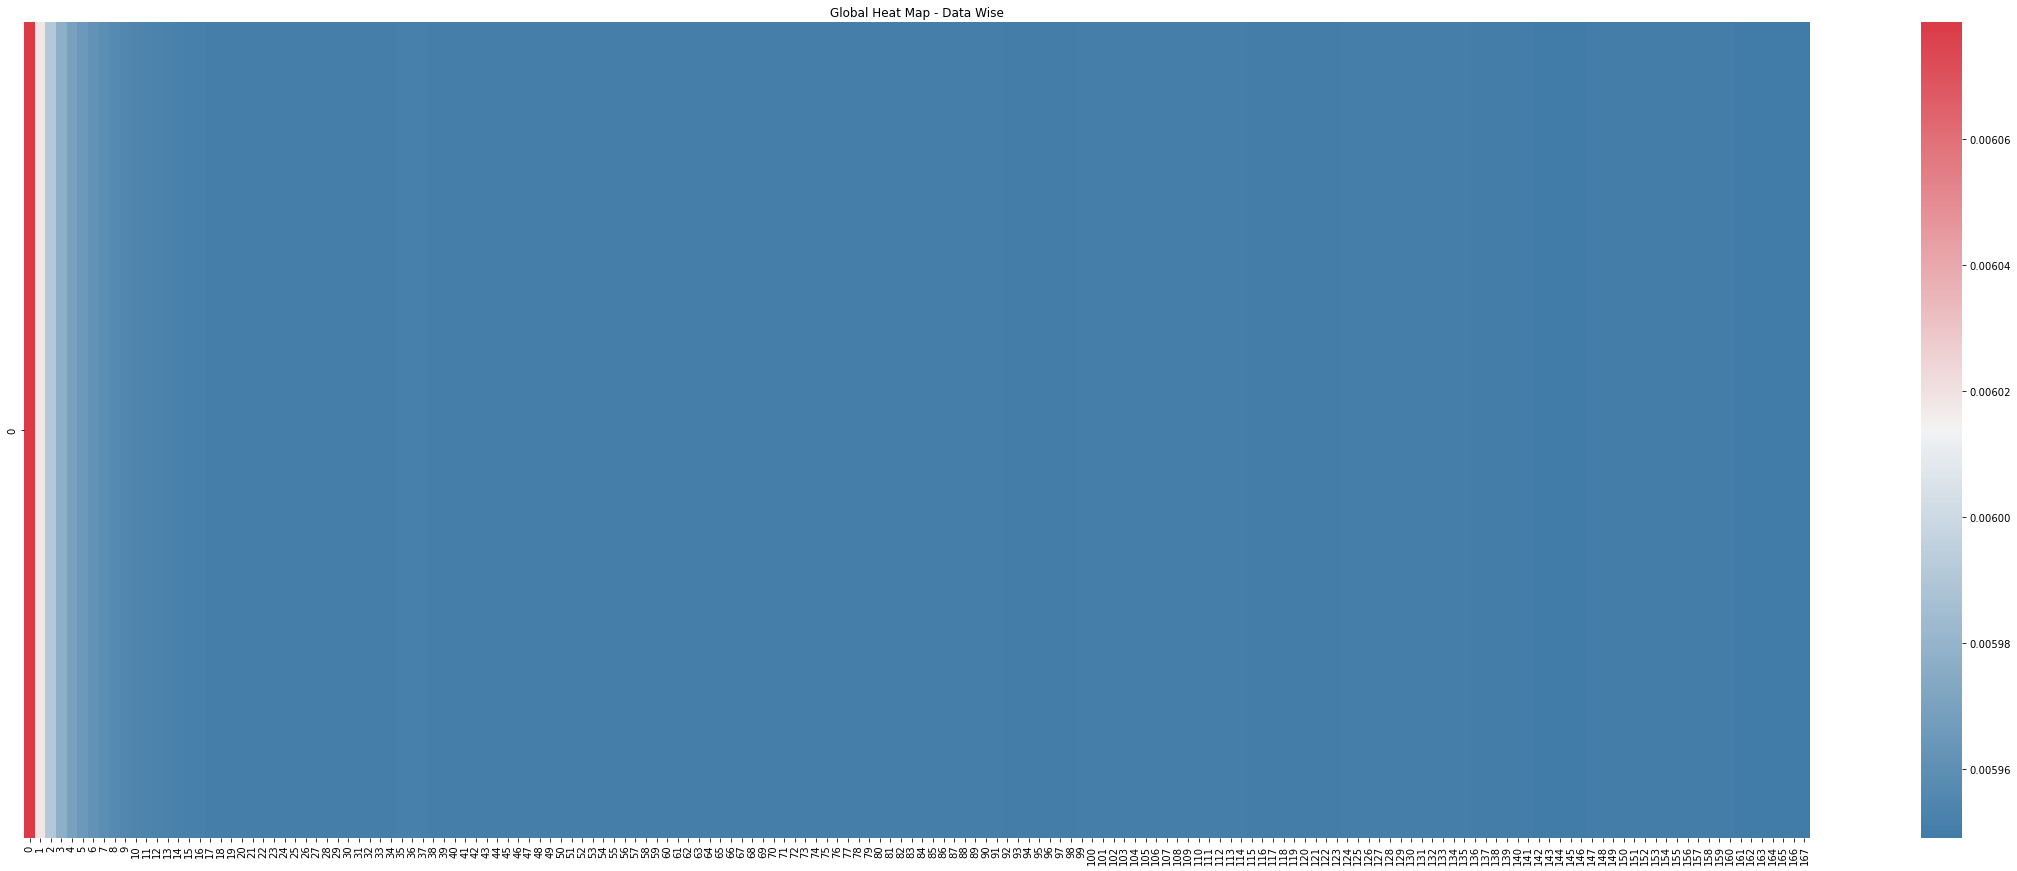

In [67]:
# compute global attention
meanAttn, meanScores = model_helper.generate_global_heatmap(model, X_test, "Global Heat Map")


- How's the heatmap looks like, for good and bad predictions


In [68]:
good_pred, bad_pred = model_helper.split_good_bad_data(X_train, Y_train, model, y_scaler)


  0%|          | 0/6758 [00:00<?, ?it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

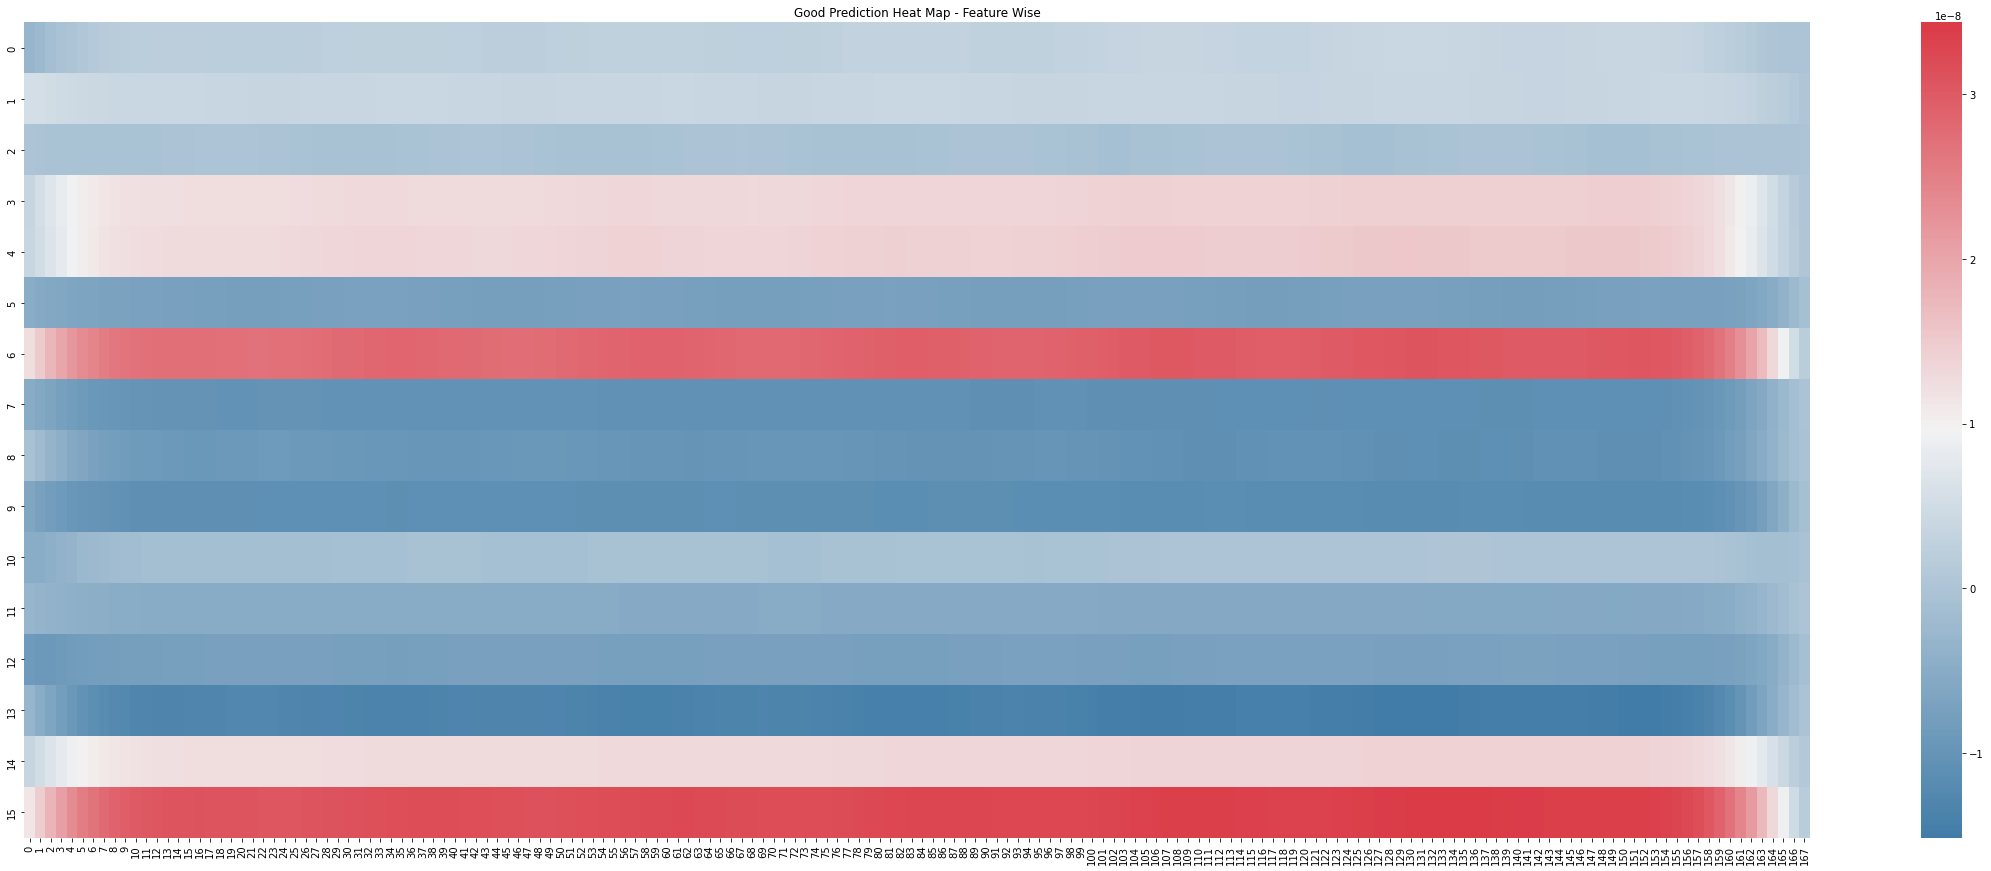

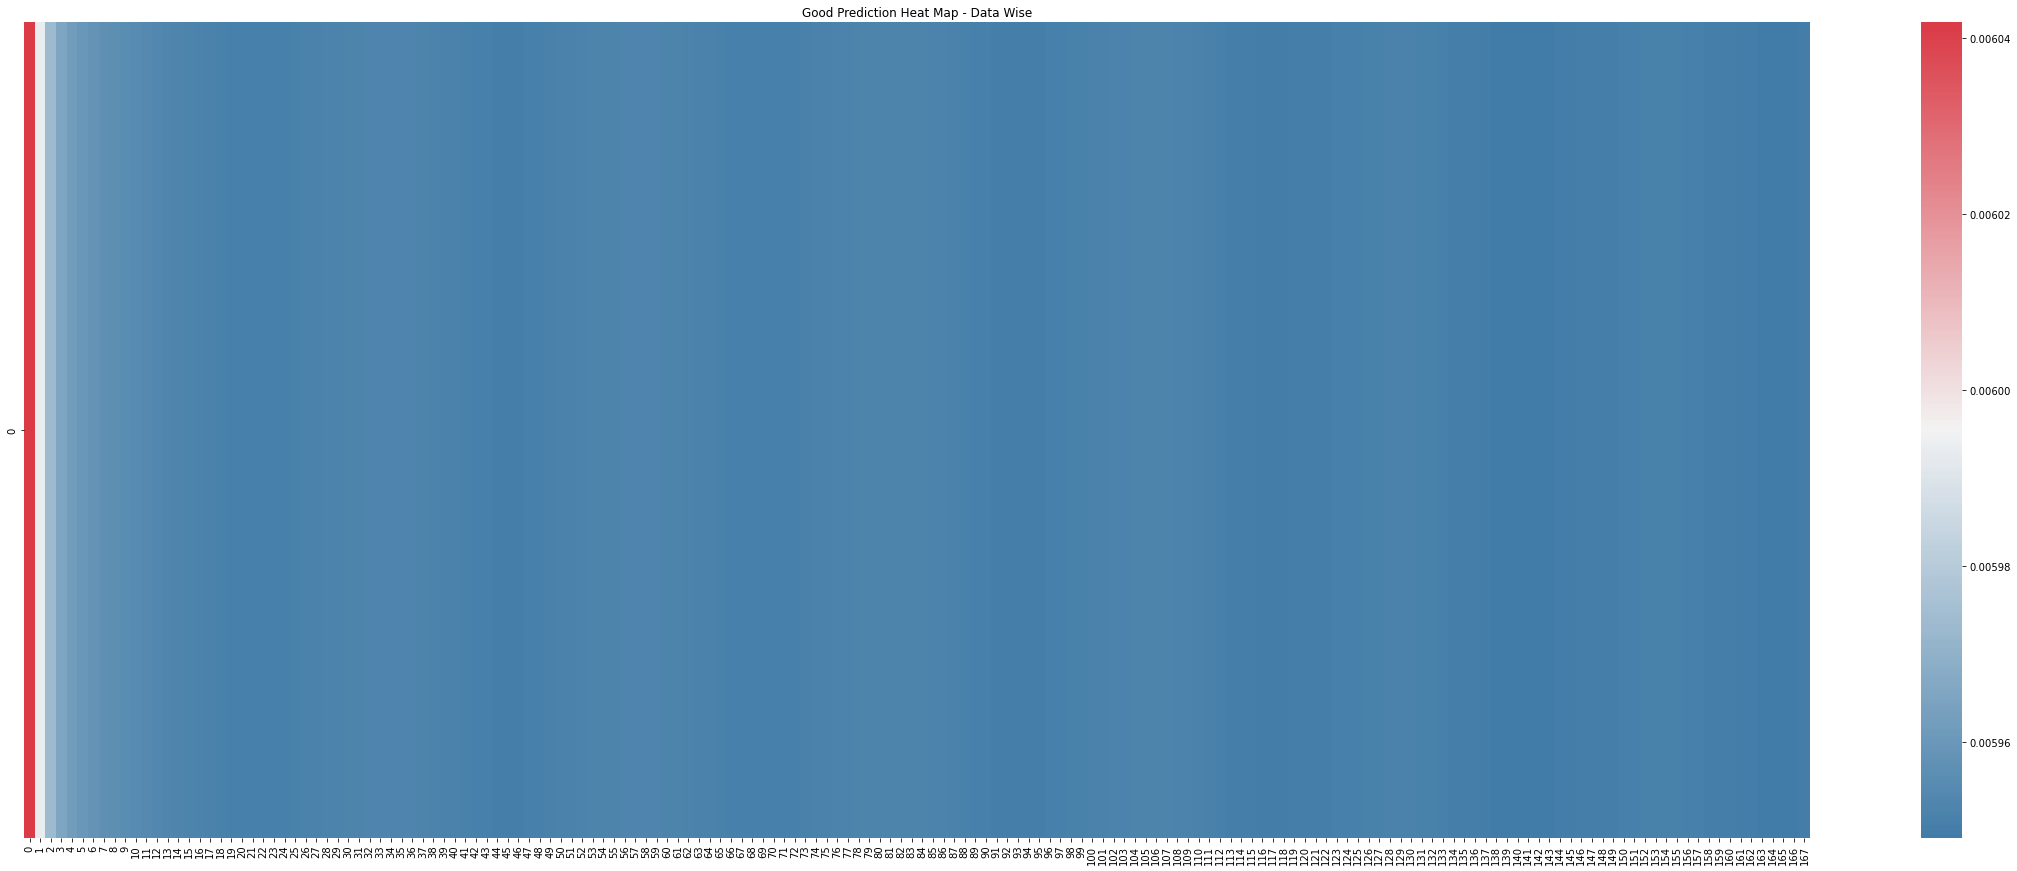

  0%|          | 0/316 [00:00<?, ?it/s]

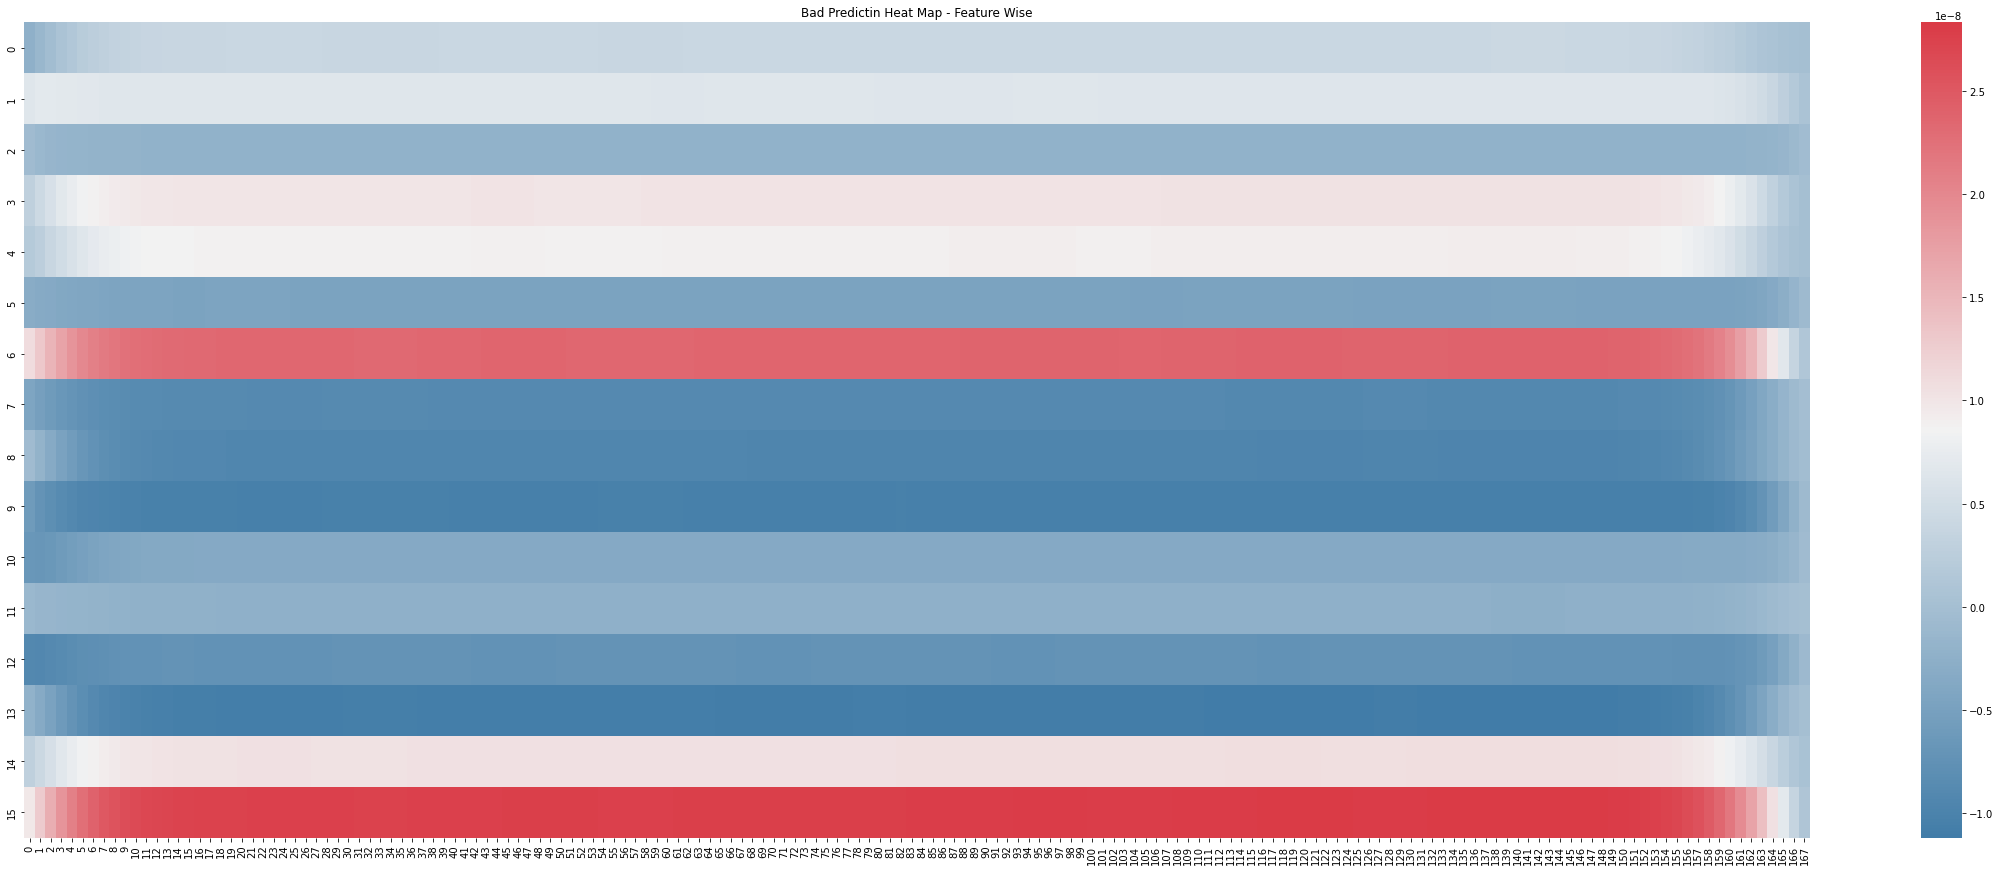

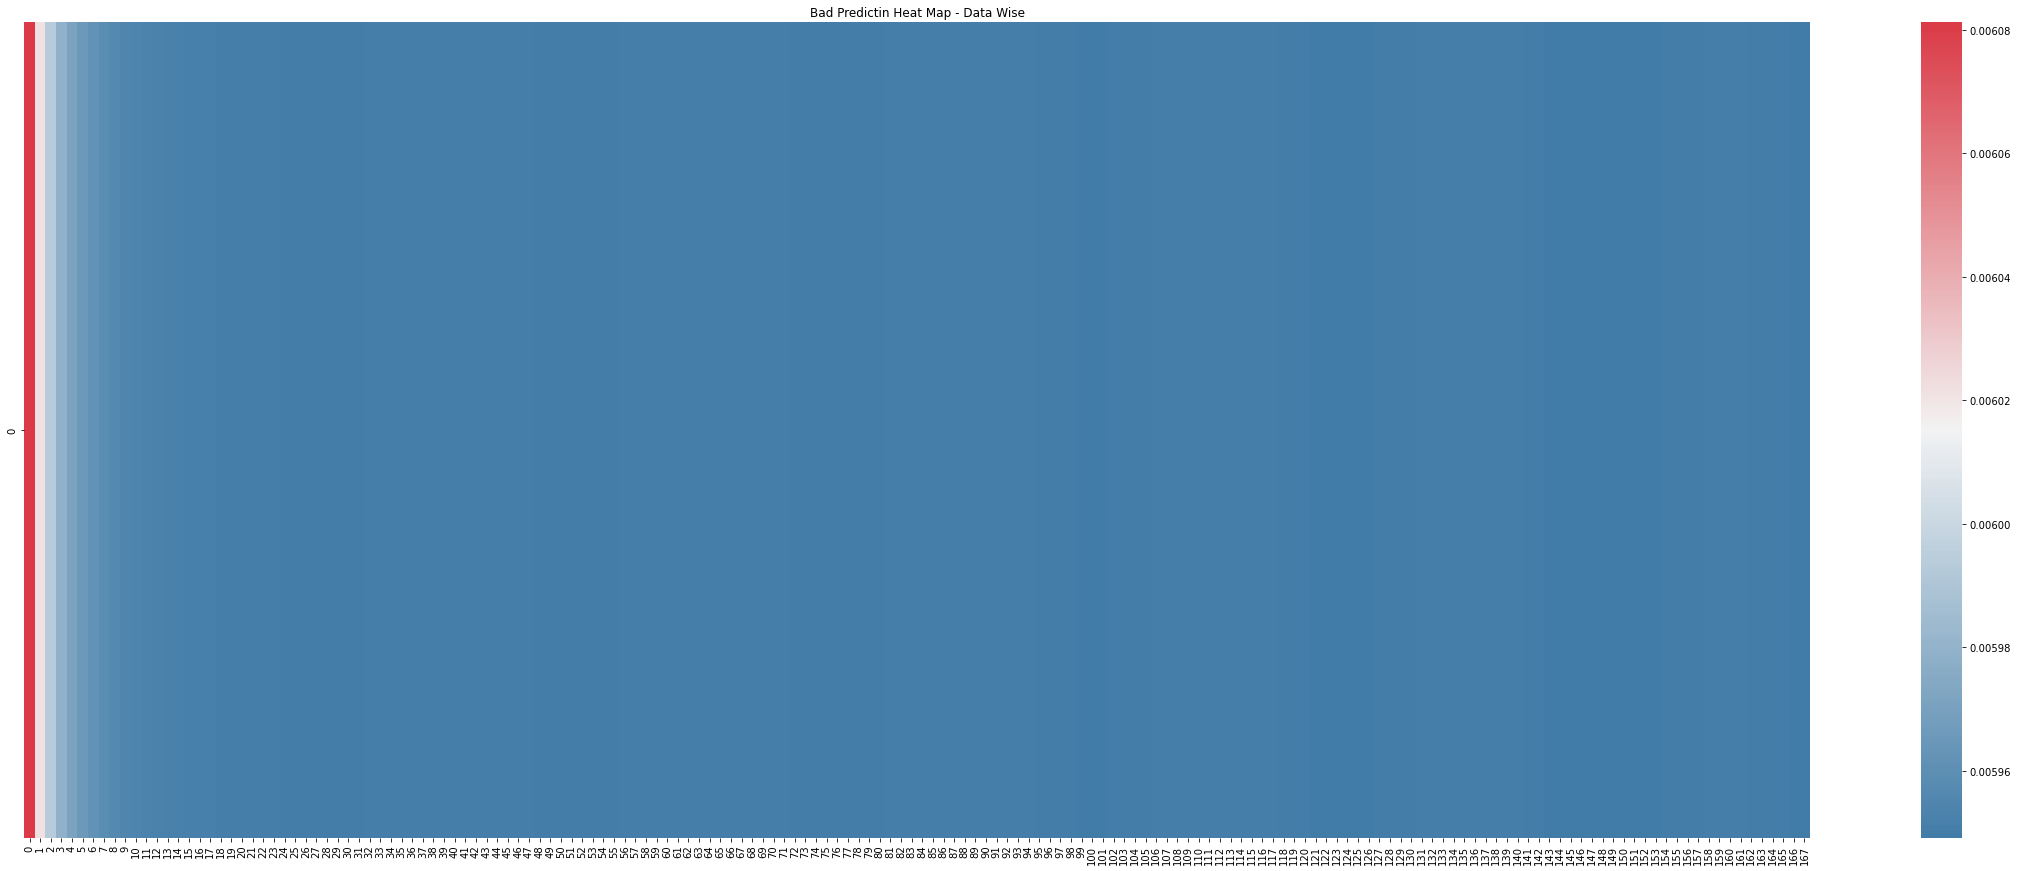

(array([[-2.4511388e-09,  6.4865699e-09, -6.4962247e-10, ...,
         -2.1659674e-09,  2.8792342e-09,  9.7489208e-09],
        [-1.4560639e-09,  6.8785604e-09, -1.2453707e-09, ...,
         -3.4104206e-09,  4.1382116e-09,  1.2761098e-08],
        [-3.6468042e-10,  6.9279227e-09, -1.5490982e-09, ...,
         -4.8439377e-09,  5.4374754e-09,  1.5861827e-08],
        ...,
        [ 2.7379574e-10,  2.8442879e-09, -1.4643960e-09, ...,
         -1.6003435e-09,  2.5452780e-09,  6.9175750e-09],
        [ 1.0750661e-10,  1.7302996e-09, -1.0082264e-09, ...,
         -5.8167088e-10,  1.3079475e-09,  3.6194756e-09],
        [ 3.8740032e-11,  6.8085504e-10, -4.5609419e-10, ...,
         -5.9645962e-11,  3.9391507e-10,  1.1579355e-09]], dtype=float32),
 array([[0.00608119],
        [0.00602113],
        [0.0059931 ],
        [0.00597896],
        [0.00597084],
        [0.00596553],
        [0.00596173],
        [0.00595885],
        [0.00595669],
        [0.00595508],
        [0.00595392],
        

In [69]:
model_helper.generate_global_heatmap(model, good_pred, "Good Prediction Heat Map")
model_helper.generate_global_heatmap(model, bad_pred, "Bad Predictin Heat Map")

- Generate the explaination (Local)


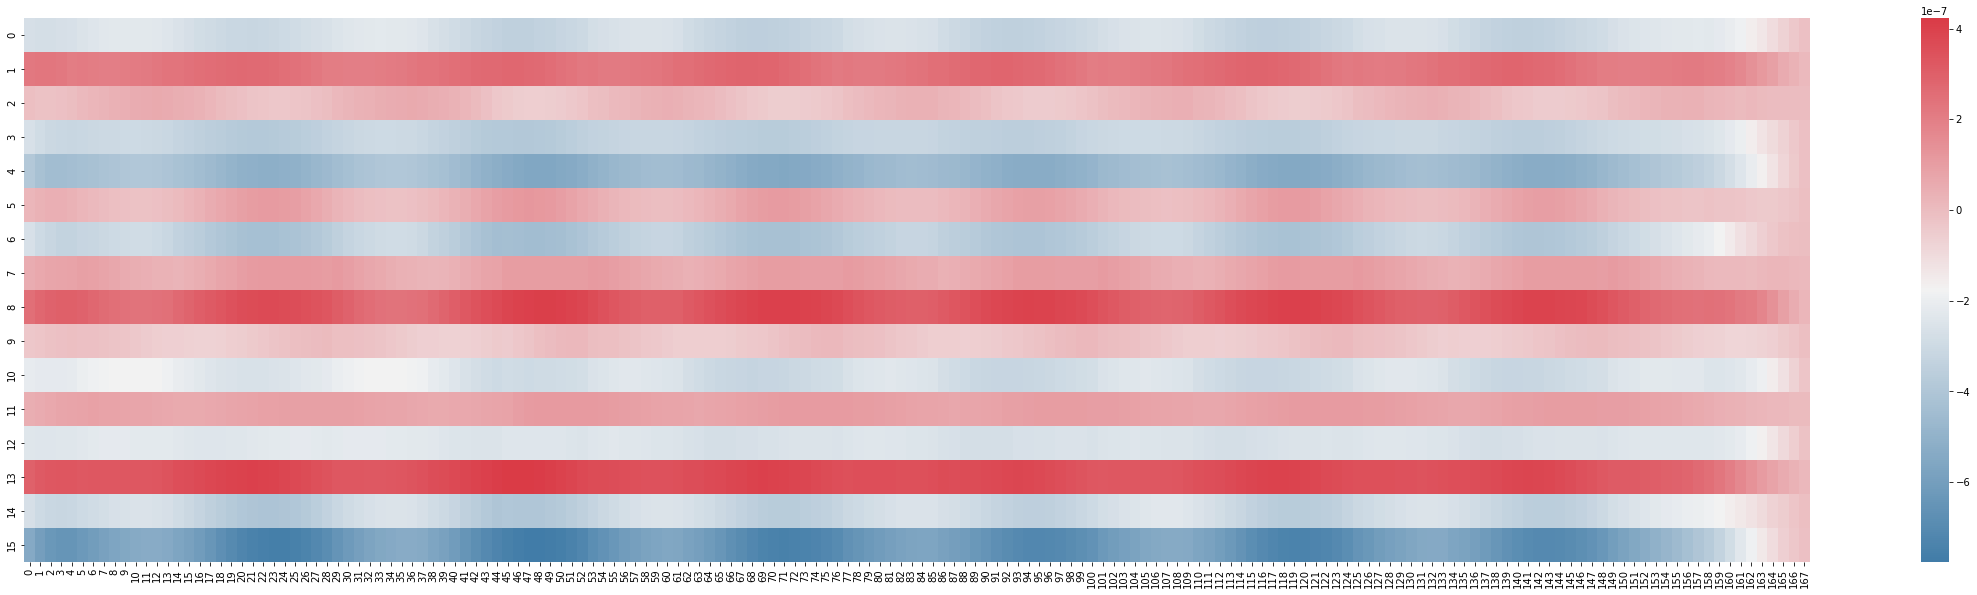

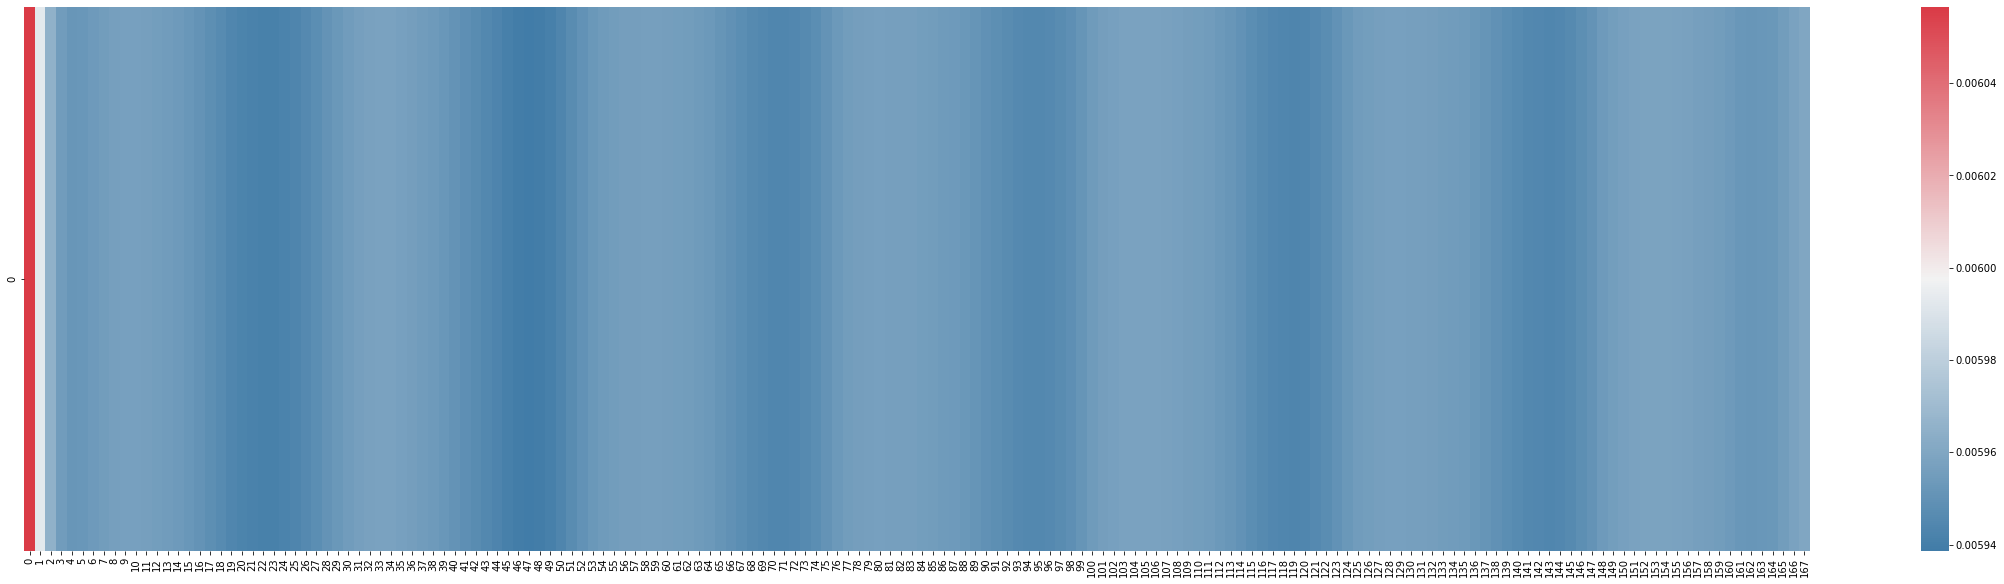

Actual result -> -0.449822484012549 && Predicted result -> -0.10374535620212555
Error - 0.34607712781042343


In [70]:
heat_index = 6
res = model_helper.disp_grads_rk(model_helper.compute_grads(None, model, X_test[heat_index]))
print(f"Actual result -> {Y_test[heat_index]} && Predicted result -> {res}")
print(f"Error - {np.mean(np.abs(Y_test[heat_index] - res))}")

- Partial dependency plt, to manipulate the data


In [71]:
X, y = train_6.iloc[:, :-1], np.reshape(y_scaler.inverse_transform(np.reshape(train_6.iloc[:, -1].to_numpy(), (-1, 1))), (-1))


In [ ]:
# polyreg = model_helper.train_plyrg_model(4, X, y)

In [ ]:
# model_helper.generate_feature_graph(polyreg, X, 3, int(len(X.columns)/3), X.columns[:-1])

- Perturbation analysis or replace less important data with random noise, K-nearest neighbor, Augmented data


- Random noise


In [72]:
# Add random noise based on the heatmap
light_blue = (0.005925, 0.005978)
dark_red = (0.006050, )
X_train_with_noise = data_helper.add_random_noise(X_train, light_blue, dark_red, model)


In [73]:
# Retrain the model with the new data
PATH_NOISE = f"./data/{city_name}_model_XAI_Noise"
model_noise = model_helper.train_model(np.shape(X_train[0])[-1], X_train_with_noise, Y_train, X_test, Y_test, False, config.BATCH_SIZE, 6, config.PRC_EPOCH, PATH_NOISE, True)


the model  ./data/tromsÃƒÂ¸_model_XAI_Noise has beed loaded !


  0%|          | 0/1690 [00:00<?, ?it/s]

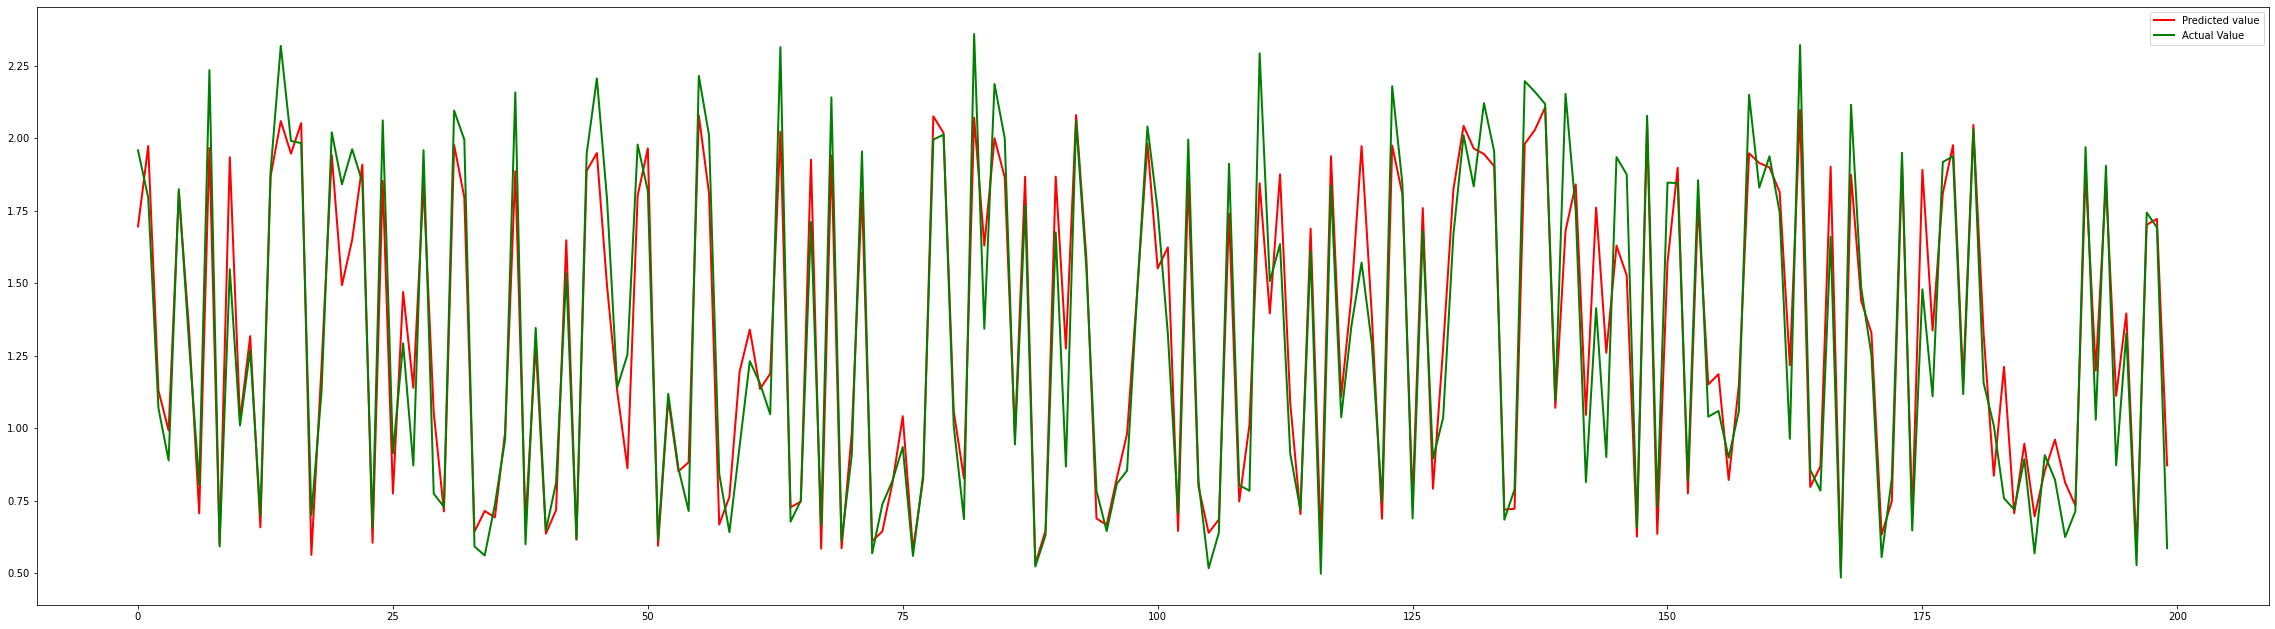

Rmse lsoss -> 0.5335957684904601
Mean absolute error -> 0.12929102778434753
R2 score -> 91.0
[2.098127, 2.044359, 0.716721, 0.7732, 1.9469291, 0.93027, 0.972199, 1.868585, 1.921246, 1.7467619, 0.872485, 1.8959401, 0.65031004, 1.3040891, 1.658904, 1.087838, 0.558098, 1.453989, 0.758101, 0.800513, 1.233493, 1.705187, 2.3668568, 1.6429889, 0.6525481, 1.231107, 2.356129, 1.739702, 1.052439, 2.26675, 1.530785, 1.014446, 1.974916, 0.615701, 2.168942, 0.864066, 0.90716803, 1.24239, 1.0706229, 1.869668, 2.100874, 1.027542, 1.046972, 0.90139, 1.8601861, 1.3160369, 0.598151, 1.6497511, 1.219185, 0.66269803, 2.1955218, 0.670072, 1.6942149, 0.872914, 0.94833, 0.652463, 1.1311361, 1.239176, 0.775016, 1.855709, 2.022901, 1.250677, 2.165459, 0.93784595, 1.2073181, 0.851589, 1.60478, 0.890109, 0.68432003, 0.82153904, 1.308352, 0.542533, 0.998773, 0.61608106, 0.879198, 1.9431599, 1.971133, 1.625352, 0.924914, 1.663536, 1.826495, 1.716753, 1.7026659, 0.586281, 0.859884, 1.56292, 1.8251591, 2.297152, 0.7

(None, None)

In [74]:
# Check the performance
noise_model_actual_value, noise_model_predicted_value, noise_model_RSME_score, noise_model_R2_score, noise_model_MAE_score, _, _ = model_helper.display_results(model_noise, X_test, Y_test, y_scaler, (0.5, 2.2), [200, 400])
print(noise_model_actual_value), print(noise_model_predicted_value)

## Analysis from the PDP -
    -> OSLO is the only city that consume a tons of electricy compare to the other ctities
    -> All the other cities might have a normal electricity demand
    -> It, would be a good experiment, to see, if the deduct Bergen data from the training data set, it might overall improve the model performance
    -> From the month graph - it seems like, at the end of the year (11, 12), consumption really spikes
    -> From the day graph - it seems like, on the day (3,4) the consumption spikes
    -> From the daylight graph - it seems like, if the daylight increase, consumption decrease
    -> From the holiday graph - it seems like, during the hoiliday consumption increase
    -> And, all the other feature, doesnt have that much deviative impact


## The whole hypothesis, is based on our specific model perforrmance, we we can call it model(technique) dependent
    -> As we can see from the model performace that, its under performing for some prediction, that is preety low compare to the average demand

- Try to adjust the training data with all the others finding and see if that improves the performance
- The hypothesis is that, from the prediction graph, we can see that, mostly our model is not performing well when the consumption is going down
- For all the spikes, the model is performing well, to solve the problem we could use different hypothesis, we could add some penalize terms to the model for lower consumption mitchmatch
- Or we could modify some traing data and convert some somple to more lower degree and see how the model perform, Or add some bias(lower consumption example) to the trainign data and see how the model perform.


# Lets try the data modification


In [75]:
train_low_demand = data_helper.adjust_train_data(train_6)

In [76]:
train_low_demand_split_X, train_low_demand_split_Y = data_helper.split_sequences(train_low_demand, config.WINDOW_SIZE)
X_train_low_demand, X_test_low_demand, Y_train_low_demand, Y_test_low_demand = train_test_split(train_low_demand_split_X, train_low_demand_split_Y, test_size=0.2, random_state=0)

In [77]:
# Retrain the model with the new data
PATH_LOW_DEMAND = f"./data/{city_name}_model_XAI_low_demand"
model_low_demand = model_helper.train_model(np.shape(X_train[0])[-1], X_train_low_demand, Y_train_low_demand, X_test_low_demand,
                               Y_test_low_demand, False, config.BATCH_SIZE, 10, config.PRC_EPOCH, PATH_LOW_DEMAND, True)


the model  ./data/tromsÃƒÂ¸_model_XAI_low_demand has beed loaded !


  0%|          | 0/1690 [00:00<?, ?it/s]

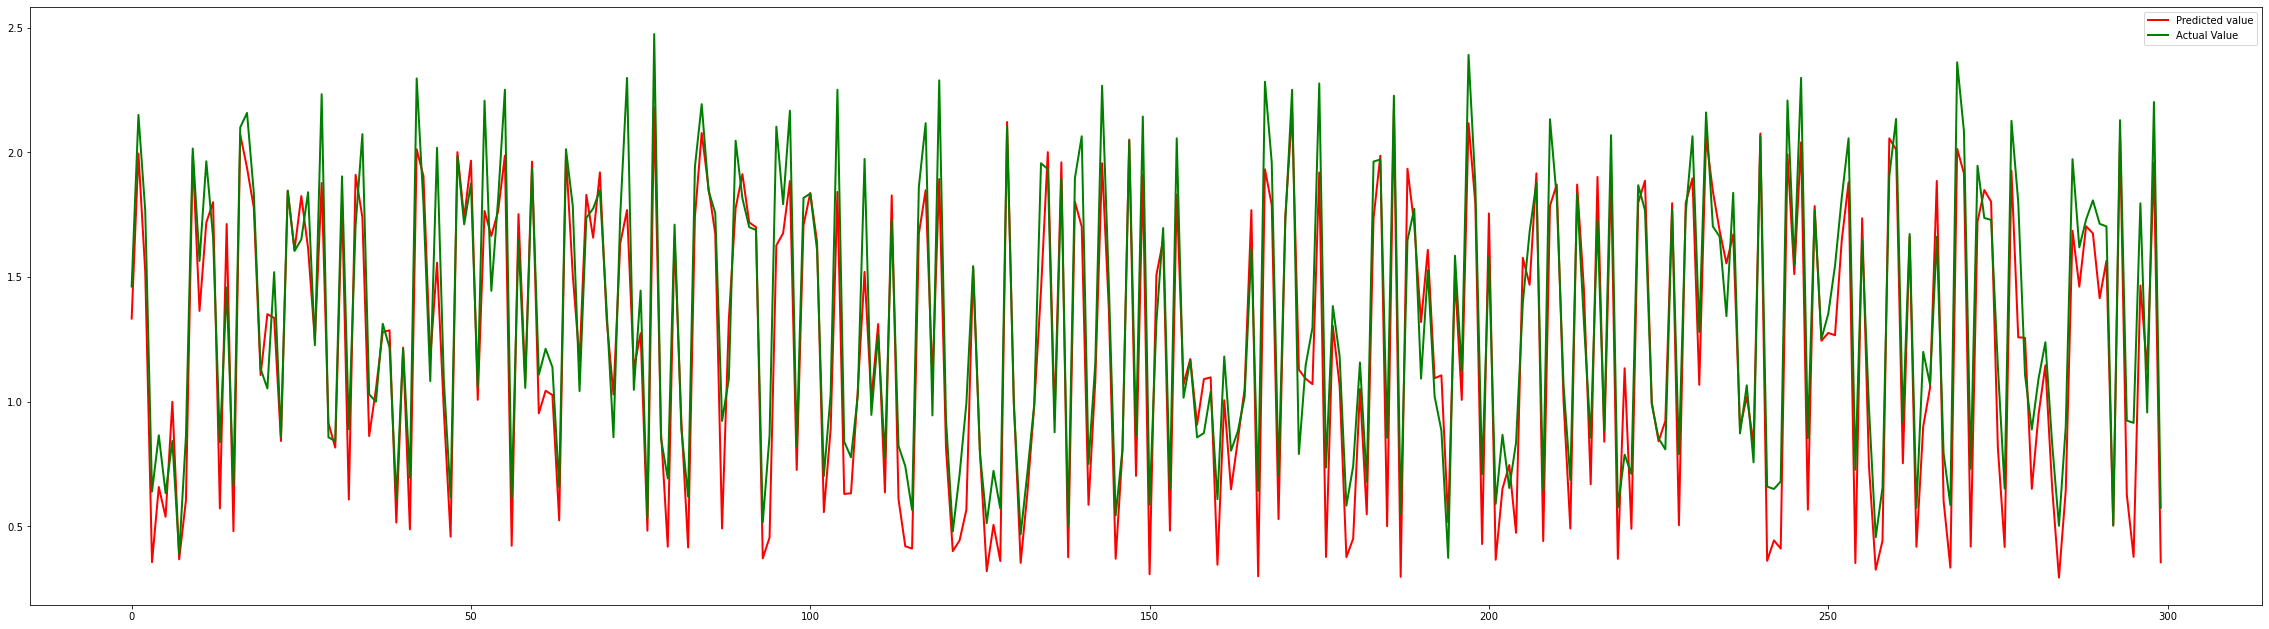

Rmse lsoss -> 0.5401676569830223
Mean absolute error -> 0.164568230509758
R2 score -> 87.0
[2.098127, 2.044359, 0.716721, 0.7732, 1.9469291, 0.93027, 0.972199, 1.868585, 1.921246, 1.7467619, 0.872485, 1.8959401, 0.65031004, 1.3040891, 1.658904, 1.087838, 0.558098, 1.453989, 0.758101, 0.800513, 1.233493, 1.705187, 2.3668568, 1.6429889, 0.6525481, 1.231107, 2.356129, 1.739702, 1.052439, 2.26675, 1.530785, 1.014446, 1.974916, 0.615701, 2.168942, 0.864066, 0.90716803, 1.24239, 1.0706229, 1.869668, 2.100874, 1.027542, 1.046972, 0.90139, 1.8601861, 1.3160369, 0.598151, 1.6497511, 1.219185, 0.66269803, 2.1955218, 0.670072, 1.6942149, 0.872914, 0.94833, 0.652463, 1.1311361, 1.239176, 0.775016, 1.855709, 2.022901, 1.250677, 2.165459, 0.93784595, 1.2073181, 0.851589, 1.60478, 0.890109, 0.68432003, 0.82153904, 1.308352, 0.542533, 0.998773, 0.61608106, 0.879198, 1.9431599, 1.971133, 1.625352, 0.924914, 1.663536, 1.826495, 1.716753, 1.7026659, 0.586281, 0.859884, 1.56292, 1.8251591, 2.297152, 0.711

(None, None)

In [78]:
# Check the performance
low_demand_model_actual_value, low_demand_model_predicted_value, low_demand_model_RSME_score, low_demand_model_R2_score, low_demand_model_MAE_score, _, _ = model_helper.display_results(
    model_low_demand, X_test_low_demand, Y_test_low_demand, y_scaler, (0, 2.2), (400, 700))
print(low_demand_model_actual_value), print(low_demand_model_predicted_value)


## Base-line model

    -> https://machinelearningmastery.com/persistence-time-series-forecasting-with-python/

## Skill score

You are told that your skill score for temperature forecasts last month was +0.25 (25%). The standard forecast used for comparison was in error by 2 degrees on average. This means:

    -> Your error is 0.25 degrees smaller than the standard score.
    -> The error of your forecasts is 2.5 degrees.
    -> The error of your forecasts is 1.5 degrees.


In [79]:
base_line_model_predicted_value, base_line_model_actual_value = model_helper.model_base_line(X_test_base, Y_test_base, y_scaler)
base_line_model_MAE_score = np.mean(np.abs(np.subtract(base_line_model_actual_value, base_line_model_predicted_value)))
print(f"Base model MAE - {base_line_model_MAE_score}")

Base model MAE - 0.5961614431554523


 * Base model skill

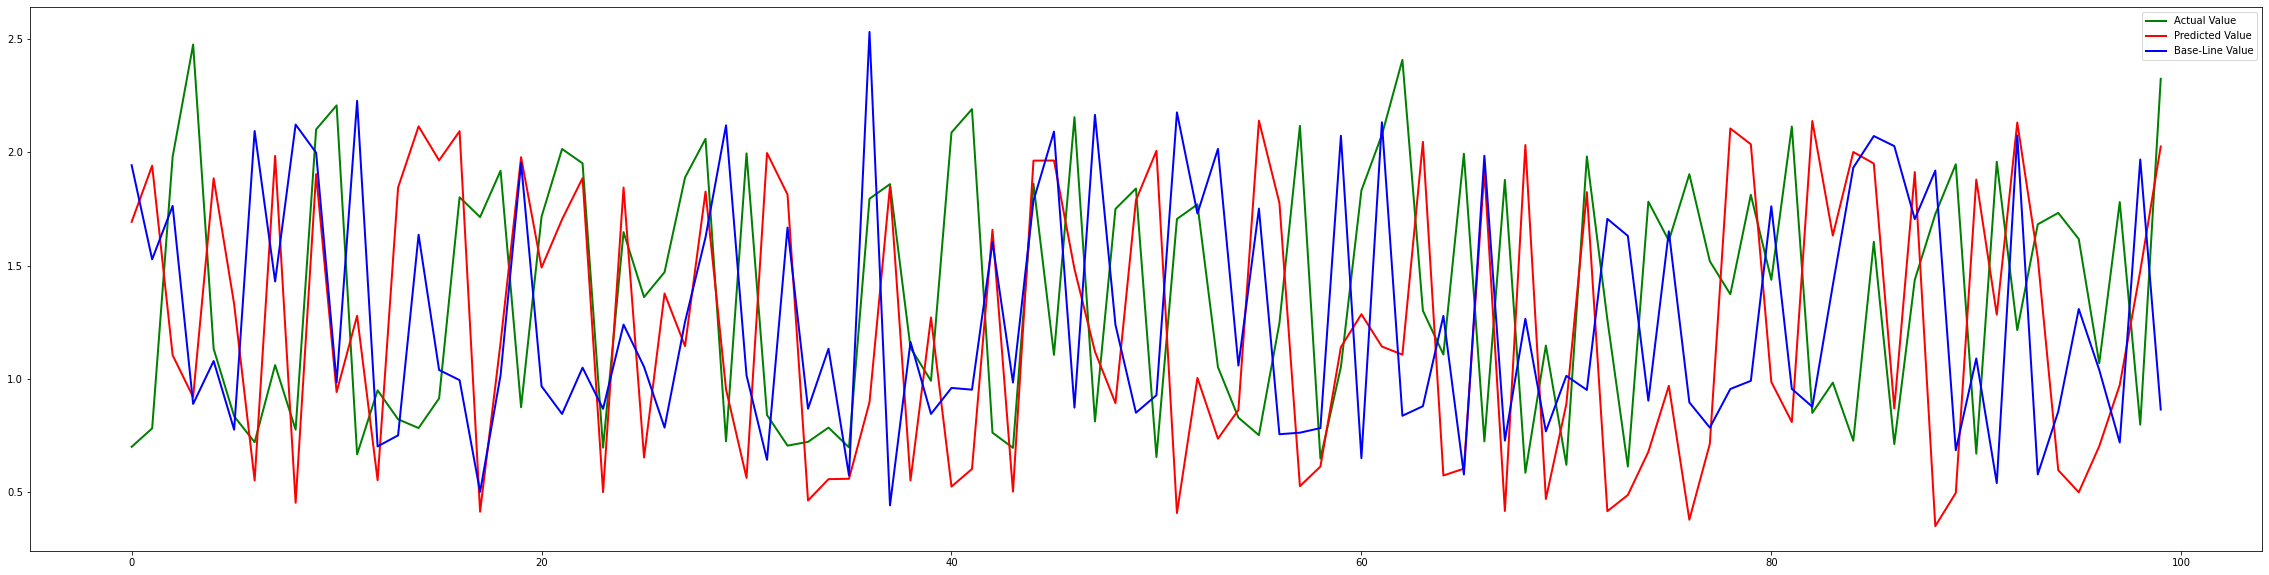

The skill score -> 0.9012857223956119


In [80]:
base_model_skill = model_helper.diplay_skill_grph(base_line_model_actual_value, 0.10, base_model_predicted_value, base_model_MAE_score, base_line_model_predicted_value, base_line_model_MAE_score, (200, 300))


 * Noise model skill

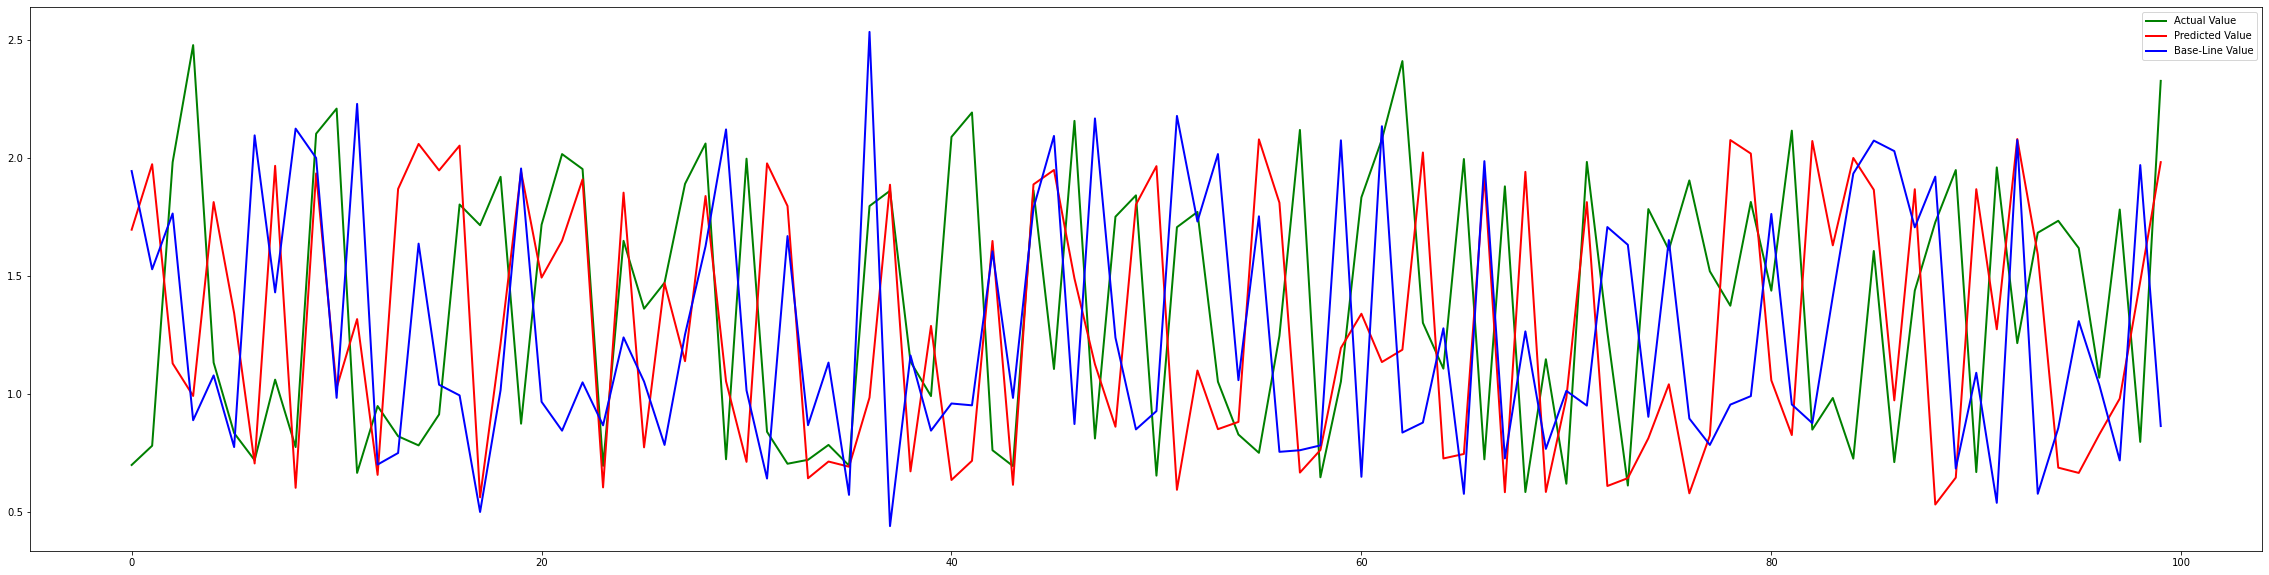

The skill score -> 0.9409647239050569


In [81]:
noise_model_skill = model_helper.diplay_skill_grph(base_line_model_actual_value, 0.10, noise_model_predicted_value, noise_model_MAE_score, base_line_model_predicted_value, base_line_model_MAE_score, (200, 300))


 * Low-demnad model skill

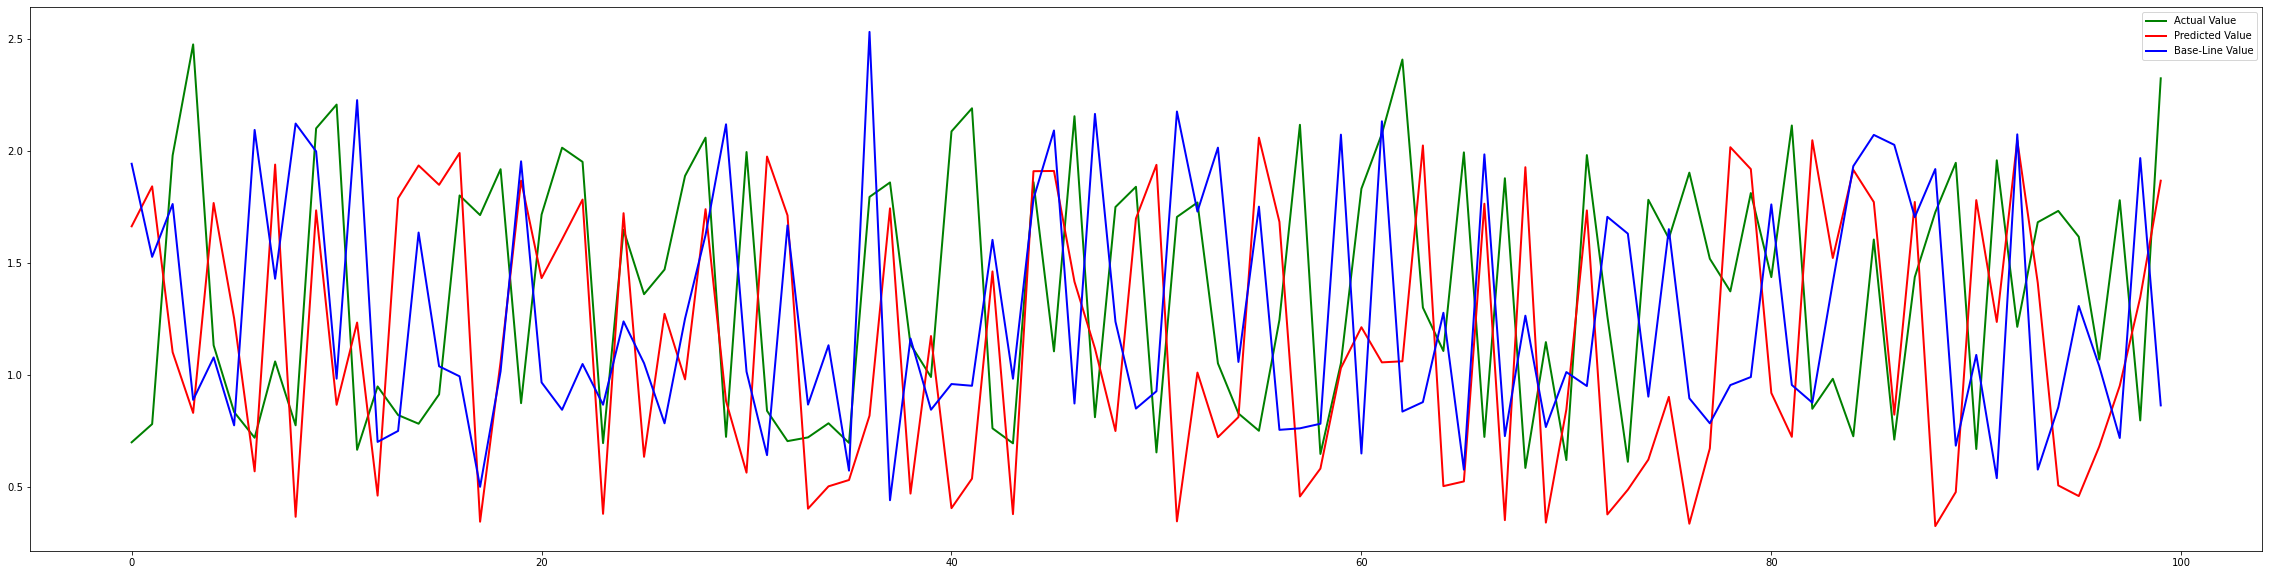

The skill score -> 0.8698644737504762


In [82]:
low_demand_model_skill = model_helper.diplay_skill_grph(base_line_model_actual_value, 0.10, low_demand_model_predicted_value, low_demand_model_MAE_score, base_line_model_predicted_value, base_line_model_MAE_score, (200, 300))


## Cross validation

In [109]:
matrix_cv_base = model_helper.cross_validation(X_train, Y_train, 10, y_scaler, (0, 2.3))
matrix_cv_noise = model_helper.cross_validation(X_train_with_noise, Y_train, 10, y_scaler, (0.5, 2.2))
matrix_cv_low_demand = model_helper.cross_validation(X_train_low_demand, Y_train_low_demand, 10, y_scaler, (0, 2.2))

Training...
Train_loss 0.53028565, Test loss : 0.48995861, Epoch 1
Train_loss 0.52850284, Test loss : 0.48645966, Epoch 2
Train_loss 0.52789192, Test loss : 0.48265330, Epoch 3
Train_loss 0.52770734, Test loss : 0.47848970, Epoch 4
Train_loss 0.52747966, Test loss : 0.47469704, Epoch 5
Train_loss 0.52558878, Test loss : 0.47433230, Epoch 6
Train_loss 0.52559079, Test loss : 0.47386813, Epoch 7
Train_loss 0.52554569, Test loss : 0.47337811, Epoch 8
Train_loss 0.52562700, Test loss : 0.47294272, Epoch 9
Train_loss 0.52555743, Test loss : 0.47247680, Epoch 10
Rmse lsoss -> 0.5150442320615222
Mean absolute error -> 0.2742914855480194
R2 score -> 60.0
Training...
Train_loss 0.54006533, Test loss : 0.51382589, Epoch 1
Train_loss 0.53927514, Test loss : 0.50870377, Epoch 2
Train_loss 0.53871722, Test loss : 0.50503777, Epoch 3
Train_loss 0.53856423, Test loss : 0.50025650, Epoch 4
Train_loss 0.53837698, Test loss : 0.49600015, Epoch 5
Train_loss 0.53735529, Test loss : 0.49510441, Epoch 6
Tra

In [114]:
print([item[-1] for item in matrix_cv_base])
print([item[-3] for item in matrix_cv_base])

print([item[-1] for item in matrix_cv_noise])
print([item[-3] for item in matrix_cv_noise])

print([item[-1] for item in matrix_cv_low_demand])
print([item[-3] for item in matrix_cv_low_demand])

[0.2742915, 0.37166095, 0.42335638, 0.38028836, 0.37155157, 0.34924483, 0.26423478, 0.2872032, 0.18142658, 0.30827]
[0.5150442320615222, 0.5368965975910276, 0.5633343495645705, 0.5577707697114421, 0.5772615118650727, 0.599654130787499, 0.5772651257488918, 0.5221013908683343, 0.5638031698896291, 0.5840833701236535]
[0.14246203, 0.16459496, 0.2127533, 0.26444623, 0.18896103, 0.198518, 0.14874123, 0.17740217, 0.15094507, 0.20865369]
[0.5205685578304186, 0.5380526219073944, 0.564679796581152, 0.5597774528323948, 0.5799382358994056, 0.5989418414512969, 0.5749260315794718, 0.5234932656260322, 0.5596819861058971, 0.5835671609032792]
[0.20022056, 0.3072479, 0.28932306, 0.32328472, 0.33354092, 0.3034047, 0.19600302, 0.19245245, 0.23398481, 0.34086877]
[0.5159494361906153, 0.5447538383387176, 0.584159697175001, 0.5596238355353951, 0.5779350845172577, 0.5995785584125986, 0.5777957597353144, 0.524180610736091, 0.5545316665316791, 0.5814246017975631]


In [110]:
print(np.average([item[-2] for item in matrix_cv_base]))
print(np.average([item[-2] for item in matrix_cv_noise]))
print(np.average([item[-2] for item in matrix_cv_low_demand]))

55.0
83.4
67.5


In [103]:
matrix_cv_base_MAE = [item[-1] for item in matrix_cv_base]
matrix_cv_noise_MAE = [item[-1] for item in matrix_cv_noise]
matrix_cv_low_demand_MAE = [item[-1] for item in matrix_cv_low_demand]

In [112]:
print([item[-2] for item in matrix_cv_base])
print([item[-2] for item in matrix_cv_noise])
print([item[-2] for item in matrix_cv_low_demand])

[60.0, 43.0, 34.0, 39.0, 52.0, 55.00000000000001, 71.0, 56.99999999999999, 84.0, 55.00000000000001]
[88.0, 86.0, 78.0, 68.0, 85.0, 84.0, 91.0, 83.0, 90.0, 81.0]
[77.0, 60.0, 67.0, 56.99999999999999, 60.0, 66.0, 84.0, 81.0, 76.0, 47.0]


In [113]:
print(stats.ttest_ind([item[-2] for item in matrix_cv_base], [item[-2] for item in matrix_cv_noise]))
print(stats.ttest_ind([item[-2] for item in matrix_cv_base], [item[-2] for item in matrix_cv_low_demand]))
print(stats.ttest_ind([item[-2] for item in matrix_cv_noise], [item[-2] for item in matrix_cv_low_demand]))

Ttest_indResult(statistic=-5.522231691077549, pvalue=3.0417535925918885e-05)
Ttest_indResult(statistic=-2.08381575393337, pvalue=0.05170163469987103)
Ttest_indResult(statistic=3.694567501607821, pvalue=0.0016586053902843526)


 * Summery

In [ ]:
summery.update({ city_name: {
    "base_model": {
        "skill_score": base_model_skill,
        "MAE_score": base_model_MAE_score,
        "RMSE_score": base_model_RSME_score,
        "R2_score": base_model_R2_score
    },
    "noise_model": {
        "skill_score": noise_model_skill,
        "MAE_score": noise_model_MAE_score,
        "RMSE_score": noise_model_RSME_score,
        "R2_score": noise_model_R2_score
    },
    "low_demand_model": {
        "skill_score": low_demand_model_skill,
        "MAE_score": low_demand_model_MAE_score,
        "RMSE_score": low_demand_model_RSME_score,
        "R2_score": low_demand_model_R2_score
    }
}})
localStorage.save_to_pkl(summery)

- KNN, hypothesis


- Write about the hypothesis


## Hypothesis -

    * Apply KNN on the data, and see different ponts in a graph, Find similar ponts(similarity methos) and compare their evaluation and fix the data.
    * For example, if some points falls within the same cluster and differ by their demand then their might be somw issue, in the training data
    * Also, write about how difficlut it would be to find the similar points, as time series data works differently compare to the normal data set
